
# Implementation Personalise without feature selection


In [1]:
from random import random
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc , matthews_corrcoef
import time

import matplotlib.pyplot as plt

# import depuis fichier python local d'implementation personalise
from RandomForestMultiThreaded import RandomForest


# Load train and test data

In [2]:
train_path = "../../../data/processed/train_data.csv"  # Replace with your train file path
test_path = "../../../data/processed/test_data.csv"    # Replace with your test file path

# Assuming the target column is named 'target'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Split features and target
X_train = train_data.drop(columns=["target"])  # Replace "target" with the actual name
y_train = train_data["target"]

X_test = test_data.drop(columns=["target"])
y_test = test_data["target"]



# Fit The Random Forest Model

In [3]:
clf = RandomForest(n_trees=10)
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 12172.61 seconds


# Run Prediction

In [4]:
start_time = time.time()
predictions = clf.predict(X_test.to_numpy())
end_time = time.time()

testing_time = end_time - start_time
print(f"Testing time: {testing_time:.2f} seconds")

Testing time: 0.06 seconds


# Calculate MCC


In [5]:
mcc = matthews_corrcoef(y_test, predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.84


# Defining Accuracy Function

In [6]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return float(accuracy)

# We Get 93% When Caclculating The Accuracy without Feature Selection

In [7]:
acc = accuracy(y_test, predictions)
acc

0.9148936170212766

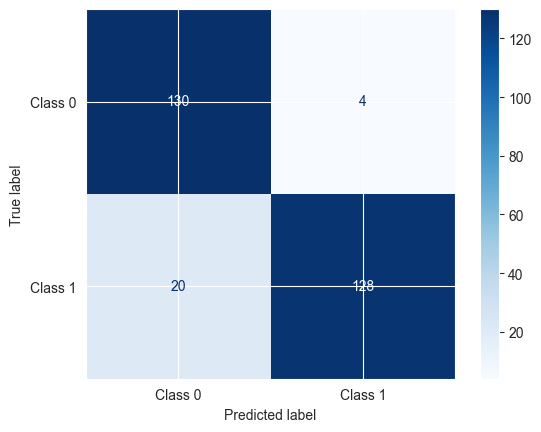

In [8]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")

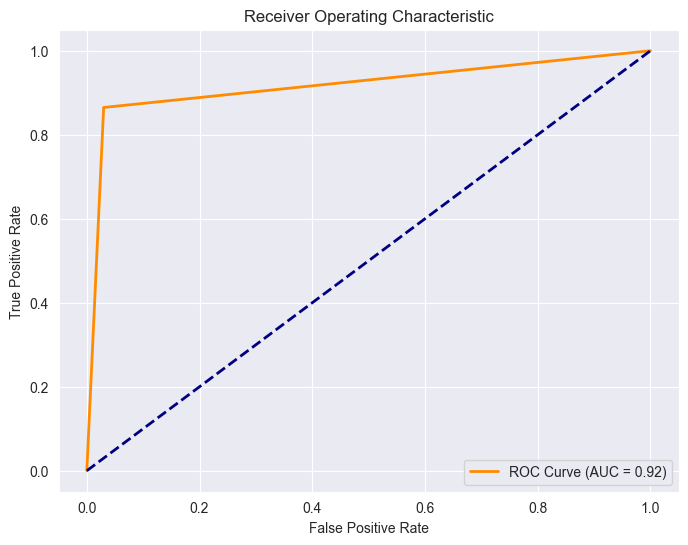

In [9]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [10]:
print("Classification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       134
           1       0.97      0.86      0.91       148

    accuracy                           0.91       282
   macro avg       0.92      0.92      0.91       282
weighted avg       0.92      0.91      0.91       282



# With Feature Selection

In [11]:
train_path = "../../../data/processed/train_filtered.csv"
test_path = "../../../data/processed/test_filtered.csv"

# Assuming the target column is named 'target'
train_data_ = pd.read_csv(train_path)
test_data_ = pd.read_csv(test_path)

# Split features and target
X_train_ = train_data_.drop(columns=["target"])  # Replace "target" with the actual name
y_train_ = train_data_["target"]

X_test_ = test_data_.drop(columns=["target"])
y_test_ = test_data_["target"]



In [12]:
clf = RandomForest(n_trees=10)

start_time = time.time()
clf.fit(X_train_, y_train_)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


Training time: 631.51 seconds


In [13]:
X_test_

,DFA,ppq5Jitter,f1,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_6th_coef,mean_1st_delta,std_4th_delta,std_7th_delta,std_delta_delta_log_energy,...,tqwt_TKEO_mean_dec_12,tqwt_TKEO_mean_dec_13,tqwt_TKEO_std_dec_11,tqwt_medianValue_dec_30,tqwt_meanValue_dec_21,tqwt_meanValue_dec_34,tqwt_skewnessValue_dec_1,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_36
0,-1.576563,-0.560819,1.492611,-0.273827,-1.914678,-0.485599,-0.189374,0.822166,-0.048272,-0.414239,...,1.353474,1.138479,1.242475,-0.132059,-0.567860,-0.218554,-0.051548,0.239203,-0.153109,-0.738987
1,1.362336,-0.241885,-1.288759,0.056284,0.223618,0.292753,-0.547828,-0.209992,-1.038679,0.749504,...,-0.174785,-0.057373,-0.324666,-0.032595,0.562061,0.220410,-0.034310,-0.365980,-0.592933,1.127896
2,-0.535210,-0.322367,-0.324364,0.289792,-0.514428,0.616782,0.320598,-1.182215,-1.219172,-0.882026,...,0.478037,-0.246263,3.267127,-0.039236,0.236604,0.440536,-0.034942,-0.535132,1.233170,-0.741086
3,0.784454,2.604214,-1.528182,0.564477,2.044828,1.093114,-1.795230,0.749555,1.206043,1.382924,...,-0.420619,-0.436721,-0.508496,-0.036893,-0.193854,0.190696,-0.016247,-0.532648,-0.677489,0.673070
4,0.069512,-0.415792,-0.221083,-0.373278,-0.765081,0.610021,-1.022864,-0.708448,-0.069780,-0.610521,...,-0.225373,-0.212497,-0.211353,-0.035407,-0.041270,0.039801,-0.020916,-0.327762,-0.579889,-0.382441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,-0.073040,0.366240,-0.435926,0.906988,-0.382252,1.400558,0.345701,1.945687,-0.096305,0.458117,...,-0.416914,-0.432377,-0.465879,-0.295169,0.199928,0.206300,-2.321312,-0.531352,-0.671721,0.761019
278,0.697687,-0.536147,-0.028090,1.157975,1.468870,-0.192737,0.240768,-1.024960,-0.596785,-0.873365,...,-0.386894,-0.355245,-0.462594,-0.036893,0.257754,0.017909,0.363509,-0.514514,-0.653068,1.915470
279,1.890068,3.222395,-1.870736,-1.746310,0.110835,0.447155,-0.652742,-0.455182,0.139621,0.974188,...,-0.384776,-0.405996,0.295607,0.378641,-0.486294,-1.140470,-0.048998,-0.534453,-0.674179,-0.372292
280,0.317827,0.389715,0.429056,1.501973,-0.747907,0.175531,-0.599301,0.834058,0.323224,-0.308352,...,1.640469,0.656329,0.859326,-0.324274,-0.406187,1.147016,0.808628,-0.505473,-0.651514,-0.743143


In [14]:
start_time = time.time()
predictions = clf.predict(X_test_.to_numpy())
end_time = time.time()

testing_time = end_time - start_time
print(f"Testing time: {testing_time:.2f} seconds")


Testing time: 0.06 seconds


# Calculate MCC

In [15]:
mcc = matthews_corrcoef(y_test_, predictions)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.85


# We Get 91% When Caclculating The Accuracy with Feature Selection

In [16]:
acc = accuracy(y_test_, predictions)
acc

0.925531914893617

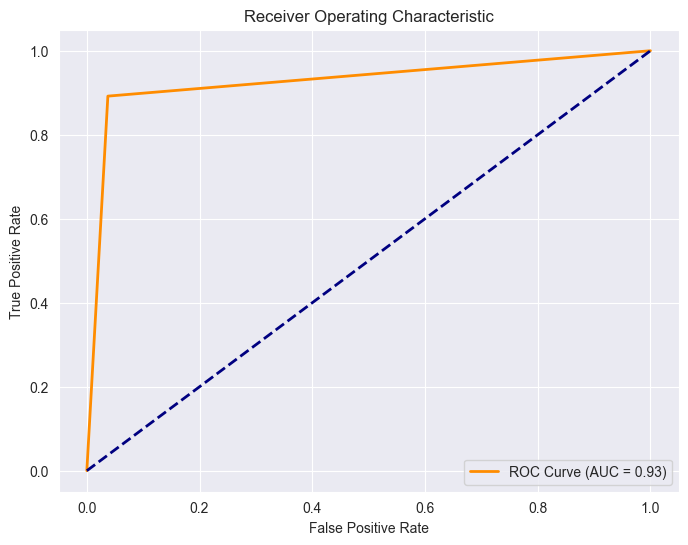

In [17]:
fpr, tpr, _ = roc_curve(y_test_, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [18]:
print("Classification Report:")
print(classification_report(y_test_, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       134
           1       0.96      0.89      0.93       148

    accuracy                           0.93       282
   macro avg       0.93      0.93      0.93       282
weighted avg       0.93      0.93      0.93       282

